## IN4080 Mandetory assignment 3

Task.1 part 1

My computer was not that strong so i put the max_nb_par limit to be 10000 else it took ages.


In [ ]:
#importing nessacary packages
from numpy.core.defchararray import join
import chatbot as chat
import nltk as nlp
import string
from nltk.tokenize.treebank import TreebankWordDetokenizer
import gzip
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
from numpy import load
import random

import heapq


def _extract_pairs(self,dialogue_data, max_nb_pairs=10000):
    #print(dialogue_data)
    
    #opening the dialog_data
    Read=gzip.open(dialogue_data,"rt",encoding="utf-8")
    content=Read.read()
    #print(content)
    
    #tokenizing the text into sentences
    To_sent=nlp.sent_tokenize(content)
    
    #creating a list of elements that is not preferable that a sentence has
    remove_token=[",","(","[",")","]","'", " "" ",";",":"]
    #transforming this list to a set
    remove_token = set(remove_token)
    
    #Removing sentences that contain the elemnets in romove tokens or if the whole sentence is in 
    #capital letters
    Cleaning = [s for s in To_sent if not any(w in remove_token for w in s) and not s.isupper() ]
    
    #importing the FIST_NAMES list in the json file
    FIRST_NAMES=open(chat.FIRST_NAMES,encoding="utf-8")
    FIRST_NAMES_1=FIRST_NAMES.read()
    FIRST_NAMES_2=eval(FIRST_NAMES_1)
   
    #creating a new list to clean the Cleaning list even more,Removing sentences that eitehr has 
    #more than 10 words or contexts that only contains one word. Also removing sentences that contains 
    #names
    to_sent_2=[]
    n=0
    for sent in Cleaning:
        #word tokenizing each sentence and appending sentence to new list
        to_sent_2.append(nlp.word_tokenize(sent))
        
       #if sentence has more than 10 words removing the newly appended element
        if len( to_sent_2[-1])>=10 :
               
              to_sent_2.remove( to_sent_2[-1])
        # if Their are more than max_nb_pairs+1 nr of questions break   
        if "?" in to_sent_2[-1]:
            n+=1
            if n==max_nb_pairs+1:
                break
        #if context only contains one word remove the newly appended  context
        if "?" in to_sent_2[-1] and len(to_sent_2[-1])==1:
              
              to_sent_2.remove( to_sent_2[-1])
              
        #if sentence contains any name from list FIRST_NAMES the len of The diffrense between
        #the set of element FIRST_NAMES and the newly appended set of words(sentence) will will 
        #This set will be smaller then set Fisrt_NAMES. If this is the case,remove newly appended sentence
        #(list of words)
        if len(set(FIRST_NAMES_2)-set(to_sent_2[-1]))!=len(set(FIRST_NAMES_2)):
             
              to_sent_2.remove( to_sent_2[-1])
             # print("yesno")

        #Transform back from list of words representing sentence to sentence.Append.                                                
        if len(to_sent_2)>0:
            #print("yesnono")
            r=TreebankWordDetokenizer().detokenize( to_sent_2[-1])
            to_sent_2.remove( to_sent_2[-1])
            to_sent_2.append(r)
           
    
    to_sent_2.remove( to_sent_2[-1])
    #print(to_sent_2)
    
    #Sort information in a dict where key is context and value for eah key(context) is a list of every 
    #answer to this context.Key (context),iterate next elements untill a new context appear,append 
    #every thing before next context into a list.
    #Could have been done easier but first when i did it i thought this was the desired output to the function.

    dictt={}
    for i,sent in enumerate(to_sent_2):
        #initialize key with empty value
        if "?" in sent:
            dictt.update({sent:[""]})
      
        
       
            l=[] 
            for j in range(i+1,len(to_sent_2)):
                 if "?" in sent:
        
             
                    if "?" in to_sent_2[j]:
                        break

                    if "?" not in to_sent_2[j]:
                    
                        l.append(to_sent_2[j])
                    
        
                
                
                        dictt[sent]=l
            
           

    pair=list(dictt.items())

    print(pair)
    
    #transform to correct format.(Context,response) for every key(context) and all element in list(values)
    #for every key [(context1,context1_value1),(context1,context1_value2),(context1,context1_value3).....]
    I=[]
    for i in range(len(pair)):
        for j in range(len(pair[i][1])):
             I.append((pair[i][0],pair[i][1][j])) 
    
    np.savez_compressed('data_pair.npz',I)
    return I

## Task 2. Part 1

In [7]:
# Making get_response
def get_response(self,user_utterance):
    #calculating user_utterance embedding
    user_utterance_vec=self.client.encode_contexts([user_utterance])
    
    #Saved matrix of where each row is the embedding for a response
    dict_data1 = load('data.npz')
    #Saved (context,response) pair
    
    #Saving is done to not calculate everything in the upper cell over and over again
    dict_data2=load('data_res.npz')
    #Computer slow so i tested taking the dotproduct between the user_utterance embeding and tousand
    #responses.If the response did make sense i did not see the meaning in waiting for hours to get
    #the response that has the highest innerproduct with the user_utterance. 
    #the responses did make sence so i did not scale up. 
    store=np.zeros(1000)
    for j in range(1000):
        #np.sum is not necaserry here because summing over one element does not make sence.When i was
        #experimenting i put this sum in front,because i was getting a matrix for the embedding
        #vector of the user_utterance,sence i did not include the list brackets,so it was calculating
        #embedding for every charecter.
        store[j]=np.sum(np.dot(user_utterance_vec, dict_data1['arr_0'][j]))
    #finding index with largest innerproduct
    indexx=np.argmax(store)
    print(dict_data2['arr_0'][indexx])

    return dict_data2['arr_0'][indexx]


    
setattr(chat.Chatbot, "_extract_pairs", _extract_pairs) 

a=chat.Chatbot()



setattr(chat.Chatbot, "get_response", get_response) 

user_utterance="Could you edit that?"
a.get_response(user_utterance)
user_utterance="Are you stupid?"
a.get_response(user_utterance)
user_utterance="Where are you?"
a.get_response(user_utterance)

[('Could you edit that?', ['T h e   d a r k.', 'And then I run.', 'I freeze.', 'I just freeze.', 'He is afraid of the dark.', '- Ghosts.', '- Tornados.', '- Aliens.', '- Roller coasters.', '-   F i r e s.']), ('Have you ever thought about that?', ['One of them anyway.']), ('Do you believe in ghosts?', ['- I do believe in ghosts.', 'Because this house has ghosts in it.', '- It might.', '- It probably does.']), ('- What do you say?', ['I say ...', '- I just kind of jump.', 'W e   b o t h   i n d e p e n d e n t l y   b e c o m e   j u m p y.', 'Gazelles.', 'Any half and half animal.', 'I guess it really is the startling aspect.', 'Your mind starts to predict something.', 'That horse is half zebra.']), ('Where am I?', ['We were so worried!', 'Oh.']), ('You know what animal scare me?', ['']), ('- Is hippos animal?', ['The hippos ...', 'Sharks.', 'I am wicked afraid of sharks.', 'It would be game over for me.', 'She scared me.']), ('-   W h a t   i s   w r o n g   w i t h   y o u?', ['Subco

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I1110 18:26:47.995088 22744 saver.py:1517] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I1110 18:26:49.177120 22744 saver.py:1517] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I1110 18:26:50.332654 22744 saver.py:1517] Saver not created because there are no variables in the graph to restore
I1110 18:26:58.713368 22744 encoder_client.py:196] Encoding 11005 examples.
I1110 18:27:18.843278 22744 encoder_client.py:200] Encoded 6016 / 11005  (54.7%)
I1110 18:27:39.125881 22744 encoder_client.py:200] Encoded 9472 / 11005  (86.1%)
I1110 18:27:59.157825 22744 encoder_client.py:200] Encoded 9856 / 11005  (89.6%)
I1110 18:28:19.782696 22744 encoder_client.py:200] Encoded 10496 / 11005  (95.4%)
I1110 18:28:40.852799 22744 encoder_client.py:211] Encoded 11005 examples in 102.139 seconds
I1110 18:28:42.526511 22744 encoder_client.py:196] Encoding 1 examples.
I1110 18:28:43.113259 22744 encoder_client.py:211] Encoded 1 examples in 0.587 seconds


I think I just did.


I1110 18:32:17.161266 22744 encoder_client.py:196] Encoding 1 examples.
I1110 18:32:17.179260 22744 encoder_client.py:211] Encoded 1 examples in 0.018 seconds


Silly question.


I1110 18:35:47.097710 22744 encoder_client.py:196] Encoding 1 examples.
I1110 18:35:47.114097 22744 encoder_client.py:211] Encoded 1 examples in 0.016 seconds


Right there.


'Right there.'

In [ ]:
# Creating _get_training_data
def _get_training_data(self):
    #importing previous saved nesessaties
    dict_data1 = load('data.npz')
    dict_data3=load("data_pair.npz")
    
    #creating a list with only context sentences
    context = [cont for cont, _ in dict_data3["arr_0"]]
    #converting it to an array
    as_arr_2=np.array(context )
    
    #response matrix of embeddings with double lenght,where the last part is just a copy of the first part
    respons_2len_512=np.concatenate((dict_data1["arr_0"],dict_data1["arr_0"]))
    
    #Calculating embeddings for all context in data_pair.npz
    context_vec=self.client.encode_contexts(as_arr_2)
    
    # making a binary vector with all ones in the first half and all zeros in the second half
    # 0 means negative response 1 means positive response 
    zero=np.zeros(len(dict_data1["arr_0"]))
    one=np.ones(len(dict_data1["arr_0"]))
    
    binary=np.concatenate((one,zero))
    
    #Shuffling context embeddings
    shufle=np.array(shuffle(pd.DataFrame(context_vec)))
   
    #adding them last to the main context matrix to create negative examples
    context_2len_512=np.concatenate((context_vec,shufle))
    
    #Now when merging input:(context, response) and output:binary vector.Negative:(shuffle(context),response)
    #get output zero and unshuffled context have good responses so they get output one.
    join=list(zip(context_2len_512,respons_2len_512,binary))
    
    #Shuffleing again to not confuse training model
    random.shuffle(join)
    train_context,train_response,binary=zip(*join)

    

    
   #returning context,response,output(binary)

    return  np.asarray(train_context),np.asarray(train_response),np.asarray(binary)
   

## Task 3. Part1

The result here where not good at all compared to in task 2,even when i calculated the dot product of all the responses with the user_utterance.Which i did not do in the previous task.The reason might be that the max dot product those not stand out compared to the other dotproducts,between spesific user_utterance embedding and responses. So the max dotproduct is becomes max just by chance.

This is just my thoughs i have not tested these explanations.

 The senario over can be caused by the positive examples not bieng very different from the negative examples

In [ ]:
# Modifiyng get_response so that it uses embebings calculated by fine_tune().
# Then doing the same thing as in the previous exersice
def get_response(self,user_utterance):
    user_utterance_vec=self.client.encode_contexts([user_utterance])

    dict_data1 = self.response_embeddings

    #print((dict_data1))
    dict_data2=load('data_res.npz')

    store=np.zeros(len(dict_data1))
    for j in range(len(dict_data1)):
        store[j]=np.sum(np.dot(user_utterance_vec, dict_data1[j]))

    indexx=np.argmax(store)
    print(dict_data2['arr_0'][indexx])

    return dict_data2['arr_0'][indexx]

    

a=chat.Chatbot()



setattr(chat.Chatbot, "get_response", get_response) 



setattr(chat.Chatbot, "_get_training_data", _get_training_data) 

a._get_training_data()
 
a.fine_tune()

In [11]:
user_utterance="Could you edit that?"
a.get_response(user_utterance)
user_utterance="Are you stupid?"
a.get_response(user_utterance)
user_utterance="Where are you?"
a.get_response(user_utterance)

[('Could you edit that?', ['T h e   d a r k.', 'And then I run.', 'I freeze.', 'I just freeze.', 'He is afraid of the dark.', '- Ghosts.', '- Tornados.', '- Aliens.', '- Roller coasters.', '-   F i r e s.']), ('Have you ever thought about that?', ['One of them anyway.']), ('Do you believe in ghosts?', ['- I do believe in ghosts.', 'Because this house has ghosts in it.', '- It might.', '- It probably does.']), ('- What do you say?', ['I say ...', '- I just kind of jump.', 'W e   b o t h   i n d e p e n d e n t l y   b e c o m e   j u m p y.', 'Gazelles.', 'Any half and half animal.', 'I guess it really is the startling aspect.', 'Your mind starts to predict something.', 'That horse is half zebra.']), ('Where am I?', ['We were so worried!', 'Oh.']), ('You know what animal scare me?', ['']), ('- Is hippos animal?', ['The hippos ...', 'Sharks.', 'I am wicked afraid of sharks.', 'It would be game over for me.', 'She scared me.']), ('-   W h a t   i s   w r o n g   w i t h   y o u?', ['Subco

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I1110 19:01:17.944397 22744 saver.py:1517] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I1110 19:01:19.154187 22744 saver.py:1517] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I1110 19:01:20.378072 22744 saver.py:1517] Saver not created because there are no variables in the graph to restore
I1110 19:01:28.665231 22744 encoder_client.py:196] Encoding 11005 examples.
I1110 19:01:48.692121 22744 encoder_client.py:200] Encoded 5632 / 11005  (51.2%)
I1110 19:02:09.671446 22744 encoder_client.py:200] Encoded 9472 / 11005  (86.1%)
I1110 19:02:30.663942 22744 encoder_client.py:200] Encoded 9856 / 11005  (89.6%)
I1110 19:02:51.535200 22744 encoder_client.py:200] Encoded 10496 / 11005  (95.4%)
I1110 19:03:12.609695 22744 encoder_client.py:211] Encoded 11005 examples in 103.944 seconds
I1110 19:03:55.376721 22744 encoder_client.py:196] Encoding 5410 examples.
I1110 19:05:34.155577 22744 encoder_client.py:200] Encoded 3584 / 5410  (66.2%)
I1110 19:05:54.402196 22744 encoder_client.py:200] Encoded 5120 / 5410  (94.6%)
I1110 19:06:09.195029 22744 encoder_client.py:211] Encoded 5410 examples in 133.821 seconds


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 512)]        0                                            
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 512)          0           input_5[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 512)          262656      input_6[0][0]                    
____________________________________________________________________________________________

I1110 19:07:25.771628 22744 encoder_client.py:196] Encoding 1 examples.
I1110 19:07:26.029201 22744 encoder_client.py:211] Encoded 1 examples in 0.260 seconds


I think I sprained my back as well.
He just arrived.


'He just arrived.'

## Task 4 Part 2

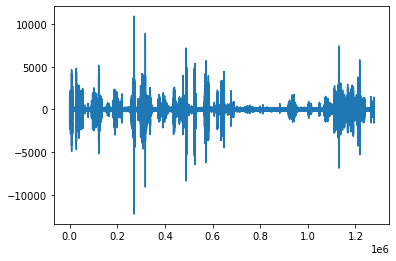

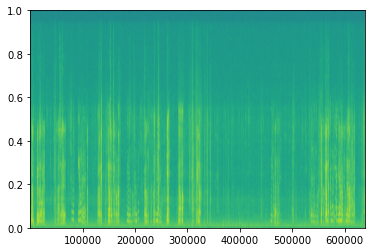

In [12]:
#Plotting the plots as requested in the task discription
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
fs, data = scipy.io.wavfile.read("C:/Users/Rayyan/Optional-Exercise---GitHub-Actions/in4080/oblig3.tar/oblig3/data/excerpt.wav")
data = data.astype(np.int32)

plt.plot(data)
plt.show()
plt.specgram(data)
plt.show()

## Task 5 Part 2

10
20
(array([   119,    135,    138, ..., 127638, 127655, 127662], dtype=int64),)


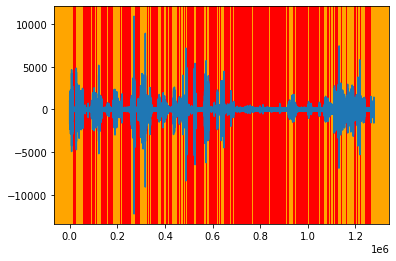

127827
79638


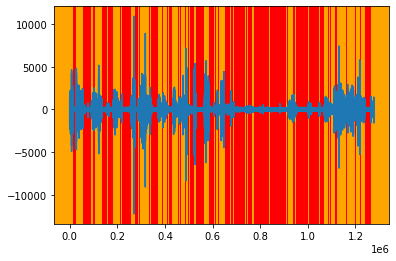

In [19]:

import math
#len of data =1278279
# 16 khz=64 000 integers data består av 1278279 integegers
#vil finne hvor mange elementer 200ms er
#16000 seconds=16khz

#1278279/64000=19.97
#19.97*16 khz=319,56 khz
#319,56*1000=319569,75
#per second 319569,75*0.2  200 ms
#numbers of integers 1278279/(319569,75*0.2)

move=math.floor(1278279/(319569.75*0.2))
step=10

print(step)


print(move)
frame=[]
#creating the frames (0-200 ms),(100-300 ms),(200-400 ms) and so on
frame_index_in_real=[]
loop_size=math.floor((len(data)/step)+1)
for i in  range(1,loop_size):
    n=(i-1)*move-step*(i-1)
    m=(i)*move-(i-1)*step
    frame_index_in_real.append((n,m))
    frame.append(data[n:m])

#print(frame[-1]) 

#print(data[-2])
frame=np.array(frame,dtype=object)
from numpy import linalg as LA
#creating the Energy list caculating the L2 norm for each frame appending to Energy list
Energy=[]
for i in range(len(frame)):
    Energy.append(LA.norm(frame[i])**2)
#calculating the mean energy
mean_energy=np.mean(Energy) 

#print(mean_energy)

#Finding the energy bound for what is considered silence.
silent=mean_energy/10

#Finding the index of frames that is considered silent
index_silent=np.where(Energy < silent)[0]

print(np.where(Energy < silent))
#print(index_silent)
#print(len(Energy))

import pandas as pd

#Usinng these indexes to find the Silent frames
Frame_as_series = pd.Series(frame_index_in_real)
accessed_series_imp_elem_2 = Frame_as_series[index_silent]

#print(accessed_series_imp_elem_2 )

#converting result to list
tolist= list(accessed_series_imp_elem_2)

#print(tolist)



#Plotting the silence frames
fig, ax = plt.subplots()
ax.set_facecolor("orange")
ax.plot(data)


#Plotting Result
for i in range(len(tolist)):
    ax.hlines(y=0,xmin=tolist[i][0],xmax=tolist[i][1],colors="r",linewidth=1000)


plt.show()




#only mark a frame as silent if the frame and all of its neighbouring frames have less than 1/10
#of the mean energy
new_list = [Energy[i-5:i+6] for i in range(5, len(Energy),1)]
#print(len(new_list[0]))

five_list_silent=[]
for i in range(len(new_list)):
    if all(y <silent for y in new_list[i]):
        five_list_silent.append(new_list[i])

#flaaten list 
flatten_list=np.hstack(five_list_silent)

#find index for frames that are relevant
as_array=np.array(flatten_list)
new_index_silent=np.isin(Energy,as_array)
print(len(new_index_silent))
print(len(index_silent))

#plotting result
fig, ax = plt.subplots()
ax.set_facecolor("orange")
ax.plot(data)

accessed_series_imp_elem_3 = Frame_as_series[new_index_silent]



tolist_1= list(accessed_series_imp_elem_3)
for i in range(len(tolist_1)):
    ax.hlines(y=0,xmin=tolist_1[i][0],xmax=tolist_1[i][1],colors="r",linewidth=1000)

plt.show()

## Task 6 Part 3

In [25]:
#impoting neccassary libraries

from threading import Event
import elevator as flr
import nltk as nlp
import string
import numpy as np
from numpy import load
from word2number import w2n
from num2words import num2words
import tkinter as tk
#Creating mapping between first and 1,second and 3,third and 3 and so on for ten floors
manual=[1,2,3,4,5,6,7,8,9,10]
d={}
#num_to_ordinal=[d.update({num2words(i,lang="en",to='ordinal'):i}) for i in hate_manual ]


def process(self, user_message, confidence_score=0.9):
  
    # if user says hello elevator responds Greatings
    if  user_message=="hello":
        self.respond("Greating")
        self.respond("where do you want to go to?")
    # if user says Which floor are we on? elvator answers which floor.Here somthing doesent work.
    #it return 3th if you are at the second and so on unless you are at 1th where it correctly returns
    #1th
    if "Which floor are we on?"  in user_message:
        self.respond(f" we are on the {self.cur_floor}th floor")
    
    #Declaring self variables
    try:
        self.prev_user_message
        self.prev_user_message_2
        self.prev_system
        
    except:
        self.prev_user_message_2="None"
        self.prev_user_message="None"
        self.prev_system="None"
    #if Kurtz Robin in user_message ask user if he would like to go to the floor where he is    
    if "Kurtz Robin" in user_message:
        self.respond("The office of Kurtz Robin is on the 4th floor. Do you wish to go there?")
        self.prev_user_message_2= user_message
    #if yes go to his floor
    if "yes" in user_message and "Kurtz Robin" in self.prev_user_message_2:
    #isinstance(self.prev_user_message_2,str)  
        self.go_to(5) 
        self.prev_user_message_2="None"
        self._show_message( "elevator","Here you go", confidence=1) 
        
        return    
 
  
   #if Erik Velldal in user_message ask user if he would like to go to the floor where he is 
    if "Erik Velldal" in user_message  :
       
        self.prev_system=self.respond("The office of Erik Velldal is on the 4th floor. Do you wish to go there?")
        self.prev_system="The office of Erik Velldal is on the 4th floor. Do you wish to go there?"
        self.prev_user_message= user_message
    #if yes go to his floor   
    if "yes" in user_message and "Erik Velldal" in self.prev_user_message:
           # isinstance(self.prev_user_message,str)
        self.go_to(6) 
        self.prev_user_message_2="None"
        self._show_message( "elevator","Here you go", confidence=1)

        return

   
          
    # Word tokenize the user_message   
    user_message=nlp.word_tokenize(user_message)
   
    
    for i,word in enumerate(user_message):
        #if elevator going some place user says stop or no the elevator stops and asks for clarification
        if "stop" in user_message or "no" in user_message:
            self.urgent_stop=True
            self.respond(f" clarification?")
            break
          #If user says a number elevator goes to that floor,not ideal but a lot of if statemnts.  
        if word.isnumeric():
            self.respond(f" Ok, going to the {eval(word)}th floor")
        
               
            self.go_to(eval(word)) 
       
            self._show_message( "elevator","Here you go", confidence=1)
            break
       
        if confidence_score<0.70:
            self.respond("could you reapete that?")
            break 
        #their are 10 floor if user says thousand foreksample elevator responds
        if word in w2n.american_number_system: 
            if w2n.word_to_num(word)>10: 
                self._show_message( "elevator","Floor not reachable", confidence=1)
                break
        # for zero floor, their are only (1-10) floor,could have added some satement for negative numbers
            if w2n.word_to_num(word)<1:
               self._show_message( "elevator","Floor not reachable", confidence=1)
               break 
             #if you are on first floor and you say down   
        if  self.cur_floor==1 and "down" in word:
            self._show_message( "elevator","Floor not reachable", confidence=1)
            break 
        #if the sentence contain one two tree and so on
        if word in w2n.american_number_system :
          
          self._show_message("elevator",f"Ok, going to the {w2n.word_to_num(word)} floor",confidence=1)
          self.go_to((w2n.word_to_num(word))) 
       
          self._show_message( "elevator","Here you go", confidence=1) 
          break
            #if you say just down
        if self.cur_floor!=1 and "down" in word  and len(user_message)==1:
             self._show_message( "elevator","What do you mean?", confidence=1)
             break     
            
            #or just up
        if "up" in word and len(user_message)==1:
             self._show_message( "elevator","What do you mean?", confidence=1)
             break
            #if the user says something with first,second,third and so on
        if  word in d.keys():
            
           self.go_to(d.get(word)) 
       
           self._show_message( "elevator","Here you go", confidence=1) 
           break 
        #if user says up one,two .... floors 
        if "up" in word and user_message[i+1] in w2n.american_number_system :
          #isinstance(w2n.word_to_num(word),int)
            self._show_message("elevator",f"Ok, going to the {self.cur_floor+w2n.word_to_num(user_message[i+1])}th floor",confidence=1)
            self.go_to((self.cur_floor+w2n.word_to_num(user_message[i+1])))
            self.cur_floor=self.cur_floor+w2n.word_to_num(user_message[i+1]) 
       
            self._show_message( "elevator","Here you go", confidence=1)
            break        
        #Or down one,two .... floors
        if "down" in word and user_message[i+1] in w2n.american_number_system  :
          #isinstance(w2n.word_to_num(word),int)
            self.go_to((self.cur_floor-w2n.word_to_num(user_message[i+1])))
            self.cur_floor=self.cur_floor-w2n.word_to_num(user_message[i+1]) 
       
            self._show_message( "elevator","Here you go", confidence=1)
            break     
        
             
    

    

setattr(flr.TalkingElevator, "process", process) 

a=flr.TalkingElevator()
